<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_112_tree_summing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

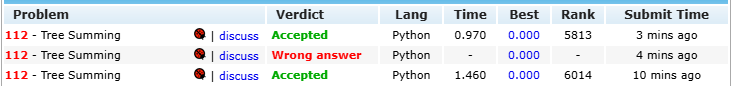

**@PDF: [UVA 112 - Tree Summing](https://onlinejudge.org/external/1/112.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

# UVA 112 Tree Summing

LISP was one of the earliest high-level programming languages and, with FORTRAN, is one of the oldest languages currently being used. Lists, which are the fundamental data structures in LISP, can easily be adapted to represent other important data structures such as trees.

This problem deals with determining whether binary trees represented as LISP S-expressions possess a certain property.

Given a binary tree of integers, you are to write a program that determines whether there exists a root-to-leaf path whose nodes sum to a specified integer.
```
       5
      / \
     4   8
    /   / \
  11  13   4
 /  \       \
7    2       1
```

For example, in the tree shown on the right there are exactly four root-to-leaf paths. The sums of the paths are 27, 22, 26, and 18. Binary trees are represented in the input file as LISP S-expressions having the following form.
```
empty tree ::= ()
tree       ::= empty tree | (integer tree tree)
```

The tree diagrammed above is represented by the expression

`(5(4(11(7()())(2()())))(8(13()())(4()(1()()))))`

Note that with this formulation all leaves of a tree are of the form.

`(integer ()())`

Since an empty tree has no root-to-leaf paths, any query as to whether a path exists whose sum is a specified integer in an empty tree must be answered negatively.

## Input

The input consists of a sequence of test cases in the form of integer/tree pairs. Each test case consists of an integer followed by one or more spaces followed by a binary tree formatted as an S-expression as described above. All binary tree S-expressions will be valid, but expressions may be spread over several lines and may contain spaces. There will be one or more test cases in an input file, and input is terminated by end-of-file.

## Output

There should be one line of output for each test case (integer/tree pair) in the input file. For each pair I.T (I represents the integer, T represents the tree) the output is the string 'yes' if there is a root-to-leaf path in T whose sum is I and 'no' if there is no path in T whose sum is I.

## Sample Input
```
22 (5(4(11(7()())(2()()))()) (8(13()())(4()(1()()))))
20 (5(4(11(7()())(2()()))()) (8(13()())(4()(1()()))))
10 (3
     (2 (4 () () )
        (8 () () ) )
     (1 (6 () () )
        (4 () () ) ) )
5 ()
```

## Sample Output

yes\
no\
yes\
no

In [ ]:
import re  # Import the regular expression module for tokenizing the input string
from sys import stdin # Import stdin for reading the entire input at once

# Define the structure for a node in the binary tree
class Node:
  def __init__(self):
    # Pointer to the left child node
    self.left = None
    # Pointer to the right child node
    self.right = None
    # Flag to indicate if this node actually holds a value
    # S-expressions like () represent empty nodes/subtrees
    self.has_value = False
    # The integer value stored in the node (if has_value is True)
    self.value = None

# --- Tree Parsing Function ---
# This function parses S-expressions from the source string and yields
# (target_sum, root_node) pairs for each complete tree definition found.
def tree_from_s_expr(source):
  """
  Parses a string containing S-expressions representing binary trees.
  An S-expression is expected in the format: target_sum (value (left_subtree) (right_subtree))
  Empty subtrees are represented by (). Example: 5 (3 (2 () ()) (1 () ()) )
  Yields tuples of (target_sum, root_node) for each tree found.
  """
  # Regular expression to find tokens: either one or more digits (possibly negative)
  # or any single character that isn't a digit, space, or newline (like '(' or ')').
  number_or_symbol = re.compile(r'(-?\d+|[^\s\d\n])') # Refined regex to handle negative numbers and avoid splitting multi-digit numbers

  root = None # Stores the root node of the tree currently being built
  target = None # Stores the target sum for the tree currently being built
  nodes = [] # Acts as a stack to keep track of parent nodes while descending the tree

  # Find all matching tokens in the entire input source string
  tokens = re.findall(number_or_symbol, source)

  # Process each token
  for token in tokens:
    if token == "(":
      # Start of a new node or subtree
      n = Node() # Create a new node object
      if len(nodes) > 0:
        # If the stack is not empty, the new node is a child of the node at the top of the stack
        parent = nodes[-1] # Get the parent node (without removing it)
        if parent.left is None:
          # If the parent's left child is not yet assigned, assign this new node there
          parent.left = n
        else:
          # Otherwise, assign it as the right child
          # Assumes valid S-expressions won't try to add a third child
          parent.right = n
      else:
        # If the stack IS empty, this '(' starts the main tree structure, so 'n' is the root
        root = n
      # Push the newly created node onto the stack, making it the current parent/context
      nodes.append(n)
    elif token == ")":
      # End of the current node or subtree definition
      # Pop the current node from the stack, signifies we are moving back up the tree
      nodes.pop()
      if len(nodes) == 0:
        # If popping makes the stack empty, we have just completed a full tree definition
        # Yield the target sum and the root node of the completed tree
        yield target, root
        # Reset for the next potential tree in the input stream
        root = None
        target = None
    else:
      # Token is a number (could be the target sum or a node value)
      value = int(token) # Convert the token to an integer
      if len(nodes) == 0:
        # If the stack is empty, this number must be the target sum for the *next* tree definition
        target = value
      else:
        # If the stack is not empty, this number is the value for the current node (top of the stack)
        current_node = nodes[-1]
        current_node.value = value
        current_node.has_value = True # Mark this node as containing a value

  # The function implicitly returns (stops yielding) when all tokens are processed.
  return # Explicit return not strictly needed in a generator, but clarifies intent

# --- Path Sum Checking Function ---
# Recursively checks if a path from the current 'root' node to any leaf
# sums up to the 'target' value, considering the 'current' sum accumulated so far.
def sum_path_exists(root, current_sum, target_sum):
  """
  Checks if a root-to-leaf path exists where node values sum to target_sum.

  Args:
      root: The current node being visited.
      current_sum: The sum accumulated on the path from the actual tree root to the parent of 'root'.
      target_sum: The target sum we are looking for.

  Returns:
      True if such a path exists starting from/through 'root', False otherwise.
  """
  # Base Case 1: We've traversed past a leaf or the tree/subtree is empty.
  if not root:
    return False

  # Add the current node's value to the path sum *if* it has one.
  # Nodes representing empty subtrees '()' won't have has_value = True.
  if root.has_value:
    current_sum += root.value

  # Base Case 2: Check if this is a leaf node.
  # A node is considered a leaf if its children are either None (not created)
  # or they exist but represent empty subtrees '()' (and thus have has_value=False).
  # NOTE: This leaf check relies on the parser creating Node objects even for '()',
  # which might be None if the S-expr was like "(5 () )" vs "(5 () ())".
  # A more robust check might be `if root.left is None and root.right is None:`,
  # assuming the parser doesn't create nodes for `()`. Let's assume the current check works with the parser.
  is_leaf = (root.left is None or not root.left.has_value) and \
            (root.right is None or not root.right.has_value)

  # If it's a leaf node AND it has a value (to be part of the sum path):
  if is_leaf and root.has_value:
    # Check if the accumulated sum matches the target sum
    return current_sum == target_sum
  # If it's a leaf node representing an empty '()' subtree, it cannot complete a valid path sum.
  elif is_leaf and not root.has_value:
      return False


  # Recursive Step: If not a leaf, explore children.
  # Check if a valid path exists down the left subtree.
  if sum_path_exists(root.left, current_sum, target_sum):
    return True # Path found, no need to check right side

  # If no path found on the left, check the right subtree.
  if sum_path_exists(root.right, current_sum, target_sum):
    return True # Path found on the right

  # If no path found down either left or right subtrees
  return False

# --- Main Execution ---

# Read all lines from standard input and join them into a single string.
# This assumes the entire input containing potentially multiple S-expressions is provided at once.
inp = "".join([line for line in stdin])

# Iterate through the (target, root) pairs generated by parsing the input string
for target, root in tree_from_s_expr(inp):
  # For each tree and its target sum:
  # Call sum_path_exists starting from the root (initial sum = 0).
  # Print "yes" if a path with the target sum is found, otherwise print "no".
  if sum_path_exists(root, 0, target):
      print("yes")
  else:
      print("no")